# Regressão Linear - Fundamentos - parte 0

* Regressão linear simples utilizando a biblioteca SkLearn
* Aluno: João Víctor Lopes de Almeida
* jvlopesdealmeida@gmail.com

In [59]:
# Autor: João Víctor Lopes de Almeida - Aluno - Unipê - Centro Universitário de João Pessoa
# Ciência de Dados com Python + Pandas, Numpy, SkLearning.
# Machine Learning - Aula 01
#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd


In [60]:
#   Criação de um dataframe apartir de um arquivo excel "passageiros"
passageiros = pd.read_csv('Passageiros.csv')

In [61]:
# Exibir as primeiras 5 linhas do seu dataframe com .head(parametro vazio por padrão exibe as 5 primeiras linhas), . tail() para exibir as ultimas linhas 
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [62]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='tempo', ylabel='nPassageiros'>

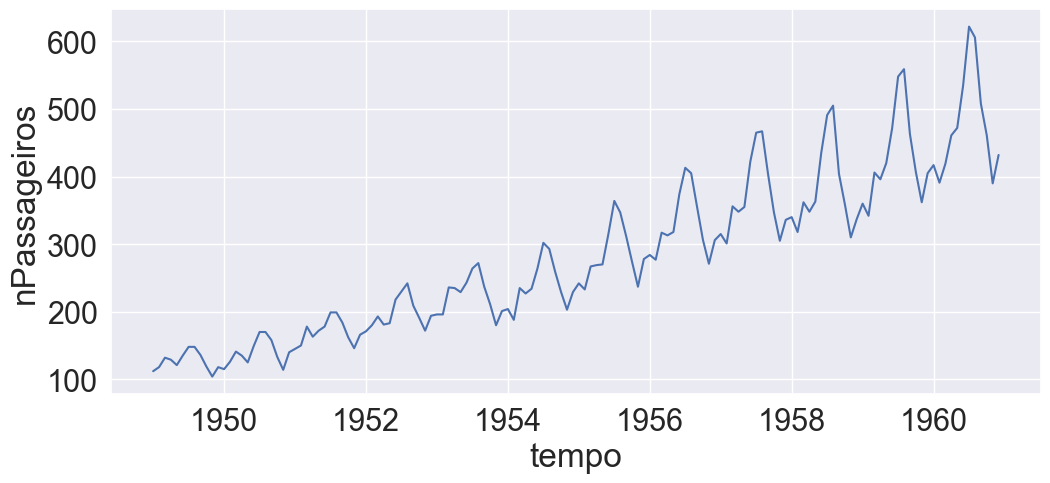

In [63]:
# Criação de graficos para visualização do dataframe. 
# Primeira linha cria a figura e determina largura e altura, utilizando .figure(figsize= (largura,altura))
# Segunda linha é uma função .set aonde posso setar as configurações do grafico, o parametro "font_scale" determina quantas vezes o tamanho da fonte padrão deseja-se exibir no grafico
# Terceira linha cria um grafico de linha utilizando a biblioteca seaborn, dando a coluna 'tempo' como eixo X e a coluna 'nPassageiros' como eixo Y, e o parametro 'data=' utiliza-se do dataframe criado anteriormente: "passageiros"
# Importante para visualizar se cabe regressão linear.
plt.figure(figsize = (12,5))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [64]:
#Seleciona todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values


In [65]:
# Seleciona a coluna de indice[1], nPassageiros
nPassageiros = passageiros.iloc[:,1].values


In [66]:
#Podemos separar parte dos dados para treino e teste
# Importação do separador de base de treino e de teste
from sklearn.model_selection import train_test_split

In [67]:
# Utilização do metodo train_test_split para separar base de treino e de testes
# A ordem é muito importante, primeiro base de treino e em seguida de teste
# test_size serve para determinar a porção que sera destinada a base de teste

Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)


In [68]:
# Importação do modelo de regressão linear
from sklearn import linear_model

In [69]:
# Criando um objeto resgatando a classe regressão linear do modelo linear da biblioteca sklearn(scikit-learn)/ linear_model.LinearRegression()
regressor = linear_model.LinearRegression()

In [70]:
#Ajustando a reta aos dados de treino
# Realiza o treinamento do modelo de regressão linear com os dados separados acima, dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression()

In [71]:
# Utiliza o modelo de regressão que criamos "regressor" para fazer previsões com base no modelo ja treinado, utiliza-se como parametro a variavel Tempo_teste, pois não fez parte do modelo de treinamento
# Serve para avaliar a precisão do modelo.
nPassageiros_predito = regressor.predict(Tempo_teste)

In [72]:
import numpy as np

In [73]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


<Axes: xlabel='Tempo', ylabel='nPassageiros'>

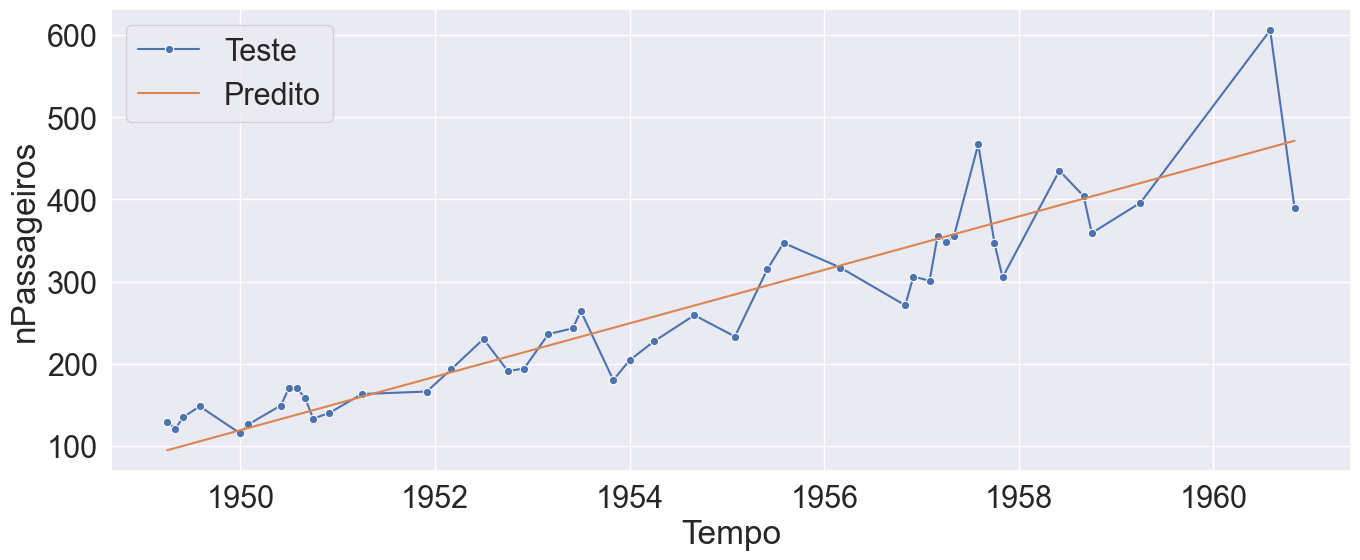

In [74]:
#Criando o grafico


plt.figure(figsize = (16,6))
sns.set(font_scale=2)
# Setando a primeira linha do grafico com os valores de teste para comparar com os de previsões, utilizando o dataframe criado no pandas acima "passageiros_teste"
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
# Setando a segunda linha do grafico com o valores de previsão, utilizando o dataframe criado no pandas acima "passageiros_predito"
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

In [75]:
# Coeficientes
print('Coeficiente: \n', regressor.coef_)

Coeficiente: 
 [32.53785086]


In [76]:
# MSE (mean square error)
print("MSE: %.2f" % np.mean((regressor.predict(Tempo) - nPassageiros) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % regressor.score(Tempo, nPassageiros))

MSE: 2096.90
Score de variação: 0.85


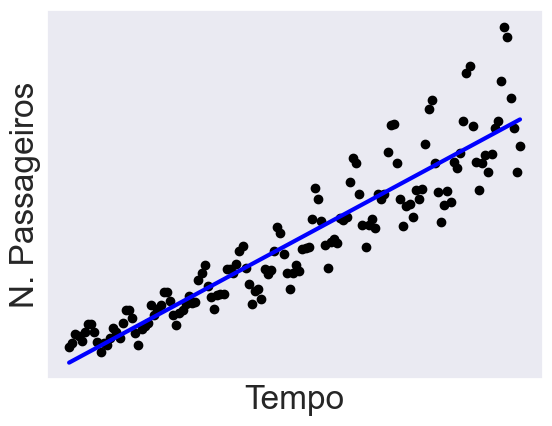

In [77]:
# Scatter Plot representando a regressão linear
# Grafico de dispersão
# Primeira linha cria o grafico de dispersão, utilizando a função .scatter(x:"Tempo",y:"nPassageiros", color = determina a cor dessa representação grafica) 
plt.scatter(Tempo, nPassageiros,  color = 'black')
# Segunda linha cria uma linha no grafico utilizando-se dos dados previstos do modelo de regressão linear: .plot(x:"Tempo",y:'regressor.predict', color = determina a cor da linha, linewidht= largura da linha)
plt.plot(Tempo, regressor.predict(Tempo), color = 'blue', linewidth = 3)
# Terceira linha determina o rotulo de X que seria 'Tempo'
plt.xlabel('Tempo')
# Quarta linha determina o rotulo de Y que seria 'N.
plt.ylabel('N. Passageiros')
# Remove as marcas do eixo X
plt.xticks(())
# Remove as marcas do eixo Y
plt.yticks(())
# Apresenta o grafico
plt.show()